------------------
# Name : Abdelrahman Basha
------------------

## Importing required libraries

In [1]:
#importing libraries

import os
import numpy as np
import random 
import pandas as pd
from time import time
from skimage import io
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from keras.layers import BatchNormalization
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score,mean_squared_error


In [2]:
def seeed():
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

def SEED():
    SEED = 123456
    os.environ['PYTHONHASHSEED']=str(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    random.seed(SEED)

## Reading the Folders 

In [3]:
os.listdir(path='.')

def getListOfFiles(dirName):
    
    listOfFile = os.listdir(dirName)
    allFiles = list()
    
    for i in listOfFile:
        fullPath = os.path.join(dirName, i)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles        


dirName1 = 'training'
dirName2 = 'testing'


listOfFiles1 = getListOfFiles(dirName1)
listOfFiles2 = getListOfFiles(dirName2)


listOfFiles1 = list()
for (dirpath, dirnames, filenames) in os.walk(dirName1):
    listOfFiles1 += [os.path.join(dirpath, file) for file in filenames]
    
listOfFiles2 = list()
for (dirpath, dirnames, filenames) in os.walk(dirName2):
    listOfFiles2 += [os.path.join(dirpath, file) for file in filenames]


# for i in listOfFiles1:
#     print(i)    

In [4]:
#For training

imgs_training = [io.imread(file) for file in listOfFiles1]

processed_imgs_training = []

for i in imgs_training:
    x = resize(i, (32, 32))
    processed_imgs_training.append(x)
    
processed_imgs_training = np.array(processed_imgs_training)


In [5]:
imgs_test = [io.imread(file) for file in listOfFiles2]

X_test = []

for i in imgs_test:
    x = resize(i, (32, 32))
    X_test.append(x)
    
X_test = np.array(X_test)


### I am considering here with 1 leaf = class 0 , 2 leaves= class 1, 3 leaves = class 2, 1 leaf = class 3 , 4 leaves= class 4, 6 leaves = class, 5 

In [6]:
#Preparing label for multiclass

ymul = []

for f in listOfFiles1:
    f=f[15:25]
    if '1' in f:
        ymul.append(0)
    elif '2' in f:
        ymul.append(1)
    elif '3' in f:
        ymul.append(2)
    elif '4' in f:
        ymul.append(3)
    else:
        ymul.append(4)

In [7]:
#Preparing label for multiclass

y_test = []

for f in listOfFiles2:
    f=f[15:24]
    if '1' in f:
        y_test.append(0)
    elif '2' in f:
        y_test.append(1)
    elif '3' in f:
        y_test.append(2)
    elif '4' in f:
        y_test.append(3)
    else:
        y_test.append(4)

In [8]:
#splitting data 
SEED()

X_train, X_valid, y_train, y_valid = train_test_split(processed_imgs_training,ymul, train_size=0.7, random_state=42, stratify=ymul)

In [9]:
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_valid = X_valid.reshape(X_valid.shape[0],32,32,3)

In [10]:
X_test = X_test.reshape(X_test.shape[0],32,32,3)

## 3.1 Classification Network


In [11]:
vgg_model = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(32, 32, 3))

In [12]:
#For classification

def CN1():
    for layer in vgg_model.layers:
        layer.trainable = False

    # We will have to use the functional API    

    # last layers output
    x = vgg_model.layers[6].output
    #Flatten as before

    x= Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x=MaxPooling2D(pool_size=(2, 2))(x)
    x= Conv2D(32, (3, 3), padding="same", activation="relu")(x)

    x = Flatten()(x)

    x = Dense(128, activation='relu')(x)
    x = Dense(5, activation='softmax')(x)

    from tensorflow.keras.models import Model
    vgg_model_transfer = Model(inputs=vgg_model.input, outputs=x)
    
    return vgg_model_transfer 

In [13]:
#print(vgg_model_transfer.summary())

In [14]:
nClasses = 5

# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_valid_k = tensorflow.keras.utils.to_categorical(y_valid, num_classes=nClasses)


In [15]:
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=nClasses)


In [16]:
batchSize = 8
nEpochs = 10

 
SEED()    

vgg_model_transfer = CN1()        
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer='adam', 
                           metrics=['accuracy'])


history = vgg_model_transfer.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_valid, y_valid_k))


C:\Users\zeroo\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
79/79 [==============================] - 5s 30ms/step - loss: 2.2858 - accuracy: 0.2175 - val_loss: 1.5746 - val_accuracy: 0.2481
Epoch 2/10
79/79 [==============================] - 2s 20ms/step - loss: 1.5018 - accuracy: 0.3444 - val_loss: 1.5653 - val_accuracy: 0.2963
Epoch 3/10
79/79 [==============================] - 2s 19ms/step - loss: 1.4177 - accuracy: 0.3841 - val_loss: 1.5632 - val_accuracy: 0.3074
Epoch 4/10
79/79 [==============================] - 2s 19ms/step - loss: 1.2167 - accuracy: 0.4683 - val_loss: 1.4876 - val_accuracy: 0.3593
Epoch 5/10
79/79 [==============================] - 2s 19ms/step - loss: 1.1120 - accuracy: 0.5349 - val_loss: 1.3758 - val_accuracy: 0.4259
Epoch 6/10
79/79 [==============================] - 2s 20ms/step - loss: 0.9594 - accuracy: 0.6048 - val_loss: 1.3358 - val_accuracy: 0.4519
Epoch 7/10
79/79 [==============================] - 3s 41ms/step - loss: 0.8549 - accuracy: 0.6476 - val_loss: 1.5132 - val_accuracy: 0.4556
Epoch 8/10
79

### Function for plotting confusion matrix

In [17]:
def plotconf_cla(y_true,y_predict,title):
    plt.figure(figsize=[15, 5])
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix( y_true.argmax(axis=1), y_predict ), annot=True, fmt='')
    plt.title(title)
    plt.xlabel('Predicted label');
    plt.ylabel('True label');
    print(f"\nClassification Report  : \n\n{classification_report(y_true.argmax(axis=-1), y_predict)}")
    return

In [18]:
def plotconf_nocla(y_true,y_predict,title):
    plt.figure(figsize=[15, 5])
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix( y_true, y_predict ), annot=True, fmt='')
    plt.title(title)
    plt.xlabel('Predicted label');
    plt.ylabel('True label');
    print(f"\nClassification Report  : \n\n{classification_report(y_true, y_predict)}")
    return

In [19]:
y_predict_prob_train = vgg_model_transfer.predict(X_train)

y_predict_train = y_predict_prob_train.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       126
           1       0.97      0.91      0.94       126
           2       0.87      0.98      0.92       126
           3       0.98      0.92      0.95       126
           4       0.95      0.97      0.96       126

    accuracy                           0.95       630
   macro avg       0.95      0.95      0.95       630
weighted avg       0.95      0.95      0.95       630



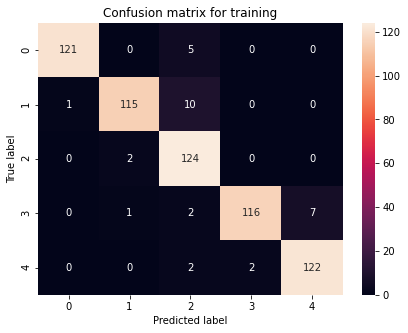

In [20]:
plotconf_cla(y_train_k,y_predict_train,'Confusion matrix for training')

In [21]:
y_predict_prob_valid = vgg_model_transfer.predict(X_valid)

y_predict_valid = y_predict_prob_valid.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        54
           1       0.51      0.52      0.51        54
           2       0.30      0.44      0.36        54
           3       0.42      0.39      0.40        54
           4       0.50      0.35      0.41        54

    accuracy                           0.47       270
   macro avg       0.49      0.47      0.48       270
weighted avg       0.49      0.47      0.48       270



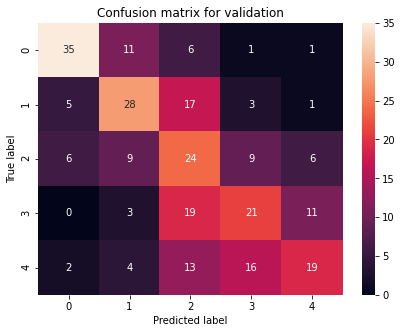

In [22]:
plotconf_cla(y_valid_k,y_predict_valid,'Confusion matrix for validation')

In [23]:
y_predict_prob_test = vgg_model_transfer.predict(X_test)
y_predict_test = y_predict_prob_test.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.52      0.60      0.56        20
           1       0.40      0.30      0.34        20
           2       0.23      0.35      0.28        20
           3       0.40      0.40      0.40        20
           4       0.42      0.25      0.31        20

    accuracy                           0.38       100
   macro avg       0.39      0.38      0.38       100
weighted avg       0.39      0.38      0.38       100



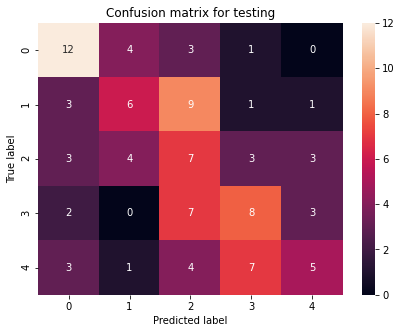

In [24]:
plotconf_cla(y_test_k,y_predict_test,'Confusion matrix for testing')

### Learning curves

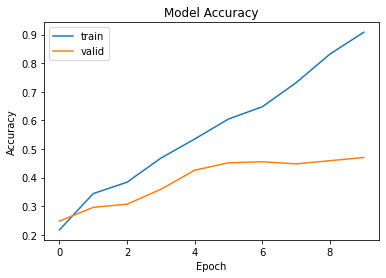

In [25]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()


## 3.2  Regression Network

In [26]:
#For Regression
def CR1():
    for layer in vgg_model.layers:
        layer.trainable = False

    # We will have to use the functional API    

    # last layers output
    x2 = vgg_model.layers[6].output
    #Flatten as before

    x2= Conv2D(64, (3, 3), padding="same", activation="relu")(x2)
    x2=MaxPooling2D(pool_size=(2, 2))(x2)
    x2= Conv2D(32, (3, 3), padding="same", activation="relu")(x2)

    x2 = Flatten()(x2)

    x2 = Dense(128, activation='relu')(x2) 
    x2 = Dense(1, activation='LeakyReLU')(x2)

    from tensorflow.keras.models import Model
    vgg_model_transfer_regr = Model(inputs=vgg_model.input, outputs=x2)
    
    return vgg_model_transfer_regr

In [27]:
y_train=np.array(y_train)
y_valid=np.array(y_valid)

In [28]:
batchSize = 64
nEpochs = 10

SEED() 
vgg_model_transfer_regr = CR1()        


sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer_regr.compile(loss='mse', 
                           optimizer='adam', 
                           metrics=['mean_squared_error'])


history_regression = vgg_model_transfer_regr.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_valid, y_valid))


C:\Users\zeroo\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
10/10 [==============================] - 4s 235ms/step - loss: 37.7651 - mean_squared_error: 37.7651 - val_loss: 11.2409 - val_mean_squared_error: 11.2409
Epoch 2/10
10/10 [==============================] - 1s 70ms/step - loss: 5.5198 - mean_squared_error: 5.5198 - val_loss: 3.7175 - val_mean_squared_error: 3.7175
Epoch 3/10
10/10 [==============================] - 1s 70ms/step - loss: 2.8656 - mean_squared_error: 2.8656 - val_loss: 2.4008 - val_mean_squared_error: 2.4008
Epoch 4/10
10/10 [==============================] - 1s 70ms/step - loss: 2.2432 - mean_squared_error: 2.2432 - val_loss: 3.0135 - val_mean_squared_error: 3.0135
Epoch 5/10
10/10 [==============================] - 1s 71ms/step - loss: 2.0457 - mean_squared_error: 2.0457 - val_loss: 2.0151 - val_mean_squared_error: 2.0151
Epoch 6/10
10/10 [==============================] - 1s 70ms/step - loss: 1.6254 - mean_squared_error: 1.6254 - val_loss: 2.0074 - val_mean_squared_error: 2.0074
Epoch 7/10
10/10 [===========

In [29]:
#np.array([num if num < 5 else 5 for num in np.round(y_predict_prob_train_regr).astype(int)])

In [30]:
y_predict_prob_train_regr = vgg_model_transfer_regr.predict(X_train)

y_predict_train_regr = np.array([num[0] if num < 5 else 5 for num in np.round(y_predict_prob_train_regr).astype(int)])


In [31]:
y_predict_prob_valid_regr = vgg_model_transfer_regr.predict(X_valid)

y_predict_valid_regr = np.array([num[0] if num < 5 else 5 for num in np.round(y_predict_prob_valid_regr).astype(int)])

In [32]:
y_predict_prob_test_regr = vgg_model_transfer_regr.predict(X_test)

y_predict_test_regr = np.array([num[0] if num < 5 else 5 for num in np.round(y_predict_prob_test_regr).astype(int)])

Mean squard error : 0.8825396825396825
----------------------------

Classification Report  : 

              precision    recall  f1-score   support

           0       0.76      0.15      0.25       126
           1       0.36      0.47      0.41       126
           2       0.33      0.60      0.43       126
           3       0.36      0.45      0.40       126
           4       0.60      0.24      0.34       126
           5       0.00      0.00      0.00         0

    accuracy                           0.38       630
   macro avg       0.40      0.32      0.30       630
weighted avg       0.48      0.38      0.37       630



C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


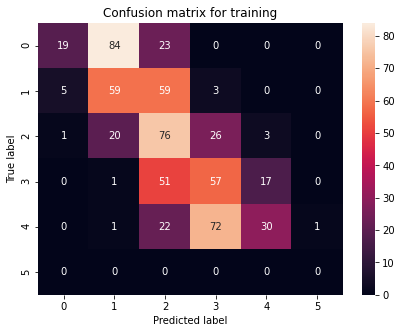

In [33]:
mse1=mean_squared_error(y_train,y_predict_train_regr)
print('Mean squard error :',mse1)
print('----------------------------')

plotconf_nocla(y_train,y_predict_train_regr,'Confusion matrix for training')

Mean squard error : 1.6962962962962962
----------------------------

Classification Report  : 

              precision    recall  f1-score   support

           0       0.43      0.11      0.18        54
           1       0.33      0.33      0.33        54
           2       0.23      0.48      0.32        54
           3       0.32      0.43      0.37        54
           4       0.24      0.07      0.11        54
           5       0.00      0.00      0.00         0

    accuracy                           0.29       270
   macro avg       0.26      0.24      0.22       270
weighted avg       0.31      0.29      0.26       270



C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


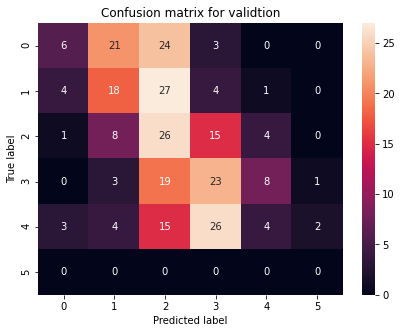

In [34]:
mse2=mean_squared_error(y_valid,y_predict_valid_regr)
print('Mean squard error :',mse2)
print('----------------------------')

plotconf_nocla(y_valid,y_predict_valid_regr,'Confusion matrix for validtion')

Mean squard error : 1.77
----------------------------

Classification Report  : 

              precision    recall  f1-score   support

           0       0.50      0.05      0.09        20
           1       0.32      0.40      0.36        20
           2       0.21      0.45      0.29        20
           3       0.32      0.40      0.36        20
           4       0.60      0.15      0.24        20
           5       0.00      0.00      0.00         0

    accuracy                           0.29       100
   macro avg       0.33      0.24      0.22       100
weighted avg       0.39      0.29      0.27       100



C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


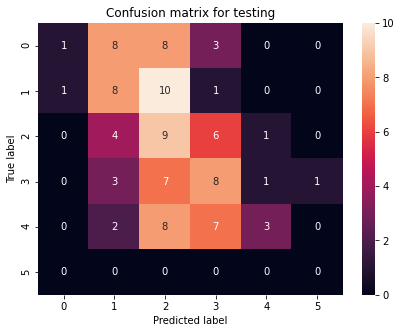

In [35]:
mse3=mean_squared_error(y_test,y_predict_test_regr)
print('Mean squard error :',mse3)
print('----------------------------')

plotconf_nocla(y_test,y_predict_test_regr,'Confusion matrix for testing')

### Learning curves

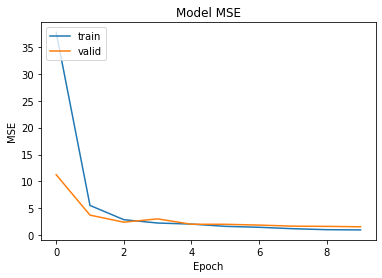

In [36]:
# dictionary keys seems to have changed in version 2
k = ''
if 'mean_squared_error' in history_regression.history :
    k = 'mean_squared_error'    

if 'mse' in history_regression.history :
    k = 'mse'
    
if k != '' :    
    plt.plot(history_regression.history[k])
    plt.plot(history_regression.history['val_'+k])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()


----------

## 3.3 Discussion
----------


### 3.1 classification
Yes, there is over fitting occuring as the size of the data is quite small, and from the learning curve the validation is away from the training one which is very bad , Furthermore the testing is away from the validation and training one according to classification metrics (Acc/ Train: 95%,Valid:47%, Test:38%)

### 3.2 Regression
No, there is under-fitting occuring as the training metrics and specially acc are very low 38% , furthermore from the learning curve the validation is a bit near from the training one (loss of validation is near the training starting from the 3rd epoch)  which is so bad , also the testing a bit near the validation and a bit near training one according to regression metrics (confusion matrix and MSE).

##### From the discussion we will choose the classification one as it performs better.


----------
## 4.1 Regularization 
----------

### classification

In [37]:
#For classification
def CN2():
    for layer in vgg_model.layers:
        layer.trainable = False

    # We will have to use the functional API    

    # last layers output
    x3 = vgg_model.layers[6].output

    x3= Conv2D(64, (3, 3), padding="same", activation="relu")(x3)
    x3=BatchNormalization()(x3)

    x3=MaxPooling2D(pool_size=(2, 2))(x3)

    x3= Conv2D(32, (3, 3), padding="same", activation="relu")(x3)

    x3 = Flatten()(x3)
    x3 = Dropout(0.01)(x3)


    x3 = Dense(128, activation='relu')(x3)
    x3 = Dense(5, activation='softmax')(x3)

    from tensorflow.keras.models import Model
    vgg_model_transfer_regul = Model(inputs=vgg_model.input, outputs=x3)
    
    return vgg_model_transfer_regul 

In [38]:

batchSize = 8
nEpochs = 10

SEED()    
vgg_model_transfer_regul = CN2()        
   
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer_regul.compile(loss='categorical_crossentropy', 
                           optimizer='adam', 
                           metrics=['accuracy'])


history_regul = vgg_model_transfer_regul.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_valid, y_valid_k))


C:\Users\zeroo\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
79/79 [==============================] - 2s 25ms/step - loss: 1.6133 - accuracy: 0.2968 - val_loss: 1.5476 - val_accuracy: 0.3778
Epoch 2/10
79/79 [==============================] - 6s 77ms/step - loss: 1.1829 - accuracy: 0.5032 - val_loss: 1.2914 - val_accuracy: 0.4185
Epoch 3/10
79/79 [==============================] - 7s 92ms/step - loss: 0.8489 - accuracy: 0.6968 - val_loss: 1.3399 - val_accuracy: 0.4111
Epoch 4/10
79/79 [==============================] - 7s 88ms/step - loss: 0.6903 - accuracy: 0.7206 - val_loss: 1.7429 - val_accuracy: 0.4370
Epoch 5/10
79/79 [==============================] - 9s 113ms/step - loss: 0.4639 - accuracy: 0.8397 - val_loss: 1.3879 - val_accuracy: 0.5000
Epoch 6/10
79/79 [==============================] - 7s 85ms/step - loss: 0.3097 - accuracy: 0.8825 - val_loss: 1.5869 - val_accuracy: 0.4963
Epoch 7/10
79/79 [==============================] - 6s 73ms/step - loss: 0.2069 - accuracy: 0.9302 - val_loss: 1.4239 - val_accuracy: 0.4704
Epoch 8/10
7

In [39]:
y_predict_prob_train_regul = vgg_model_transfer_regul.predict(X_train)

y_predict_train_regul = y_predict_prob_train_regul.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       126
           1       1.00      0.99      1.00       126
           2       1.00      0.99      1.00       126
           3       1.00      0.99      1.00       126
           4       1.00      1.00      1.00       126

    accuracy                           1.00       630
   macro avg       1.00      1.00      1.00       630
weighted avg       1.00      1.00      1.00       630



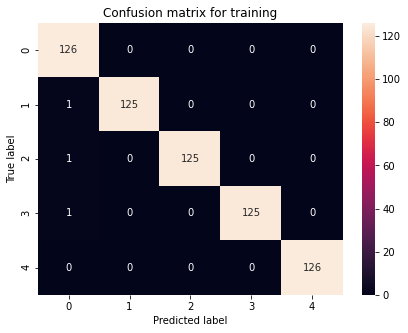

In [40]:
plotconf_cla(y_train_k,y_predict_train_regul,'Confusion matrix for training')

In [41]:
y_predict_prob_valid_regul = vgg_model_transfer_regul.predict(X_valid)

y_predict_valid_regul = y_predict_prob_valid_regul.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.52      0.89      0.65        54
           1       0.63      0.48      0.55        54
           2       0.47      0.28      0.35        54
           3       0.43      0.37      0.40        54
           4       0.56      0.59      0.58        54

    accuracy                           0.52       270
   macro avg       0.52      0.52      0.50       270
weighted avg       0.52      0.52      0.50       270



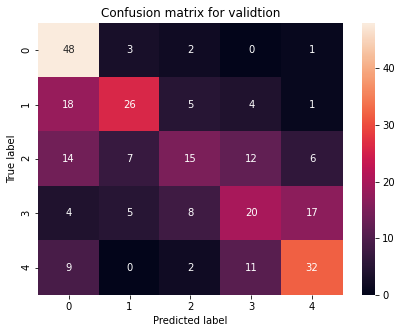

In [42]:
plotconf_cla(y_valid_k,y_predict_valid_regul,'Confusion matrix for validtion')

In [43]:
y_predict_prob_test_regul = vgg_model_transfer_regul.predict(X_test)

y_predict_test_regul = y_predict_prob_test_regul.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.38      0.70      0.49        20
           1       0.42      0.40      0.41        20
           2       0.31      0.20      0.24        20
           3       0.42      0.40      0.41        20
           4       0.58      0.35      0.44        20

    accuracy                           0.41       100
   macro avg       0.42      0.41      0.40       100
weighted avg       0.42      0.41      0.40       100



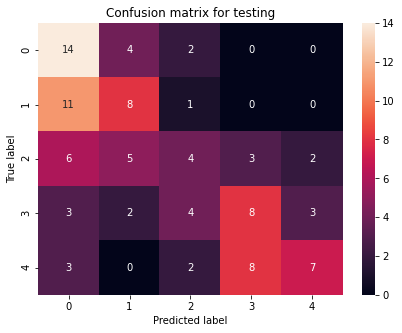

In [44]:
plotconf_cla(y_test_k,y_predict_test_regul,'Confusion matrix for testing')

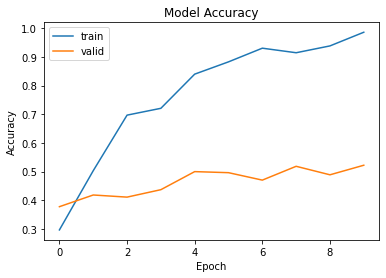

In [45]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_regul.history :
    k = 'accuracy'    

if 'acc' in history_regul.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_regul.history[k])
    plt.plot(history_regul.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()


## 5. Data Augmentation

In [82]:
from tensorflow import keras

data_augmentation = tf.keras.Sequential([
   tf.keras.layers.RandomFlip("horizontal"),
   tf.keras.layers.RandomRotation(0.4),
   tf.keras.layers.RandomZoom(0.1) 
])

#x_train_aug =data_augmentation(X_train)

In [47]:
aug=data_augmentation(X_train)

X_train_aug_new=np.concatenate((X_train, aug))

In [48]:
y_train_conc=np.concatenate((y_train_k, y_train_k))

### classification

In [105]:
batchSize = 8
nEpochs = 10


SEED()
vgg_model_transfer_regul_aug=CN2()

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer_regul_aug.compile(loss='categorical_crossentropy', 
                           optimizer='adam', 
                           metrics=['accuracy'])


history_regul_aug = vgg_model_transfer_regul_aug.fit(X_train_aug_new, y_train_conc, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_valid, y_valid_k))


C:\Users\zeroo\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
158/158 [==============================] - 4s 20ms/step - loss: 1.5323 - accuracy: 0.3286 - val_loss: 1.3785 - val_accuracy: 0.3963
Epoch 2/10
158/158 [==============================] - 3s 18ms/step - loss: 1.1861 - accuracy: 0.5111 - val_loss: 1.3586 - val_accuracy: 0.3556
Epoch 3/10
158/158 [==============================] - 3s 17ms/step - loss: 0.9382 - accuracy: 0.6103 - val_loss: 1.2688 - val_accuracy: 0.4815
Epoch 4/10
158/158 [==============================] - 3s 17ms/step - loss: 0.7624 - accuracy: 0.7016 - val_loss: 1.2298 - val_accuracy: 0.4889
Epoch 5/10
158/158 [==============================] - 3s 17ms/step - loss: 0.5862 - accuracy: 0.7579 - val_loss: 1.5936 - val_accuracy: 0.4481
Epoch 6/10
158/158 [==============================] - 3s 17ms/step - loss: 0.4877 - accuracy: 0.8183 - val_loss: 1.6925 - val_accuracy: 0.4444
Epoch 7/10
158/158 [==============================] - 3s 17ms/step - loss: 0.3265 - accuracy: 0.8849 - val_loss: 1.3309 - val_accuracy: 0.5185

In [106]:
y_predict_prob_train_regul_aug = vgg_model_transfer_regul_aug.predict(X_train_aug_new)

y_predict_train_regul_aug = y_predict_prob_train_regul_aug.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       252
           1       0.71      1.00      0.83       252
           2       0.94      0.79      0.86       252
           3       0.87      0.85      0.86       252
           4       1.00      0.81      0.90       252

    accuracy                           0.88      1260
   macro avg       0.90      0.88      0.88      1260
weighted avg       0.90      0.88      0.88      1260



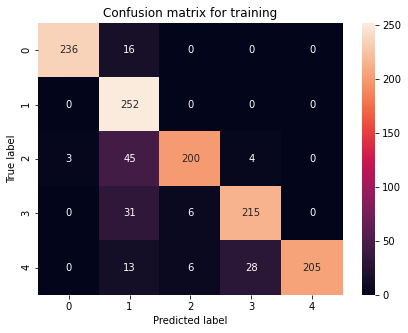

In [107]:
plotconf_cla(y_train_conc,y_predict_train_regul_aug,'Confusion matrix for training')

In [108]:
y_predict_prob_valid_aug = vgg_model_transfer_regul_aug.predict(X_valid)

y_predict_valid_regul_aug = y_predict_prob_valid_aug.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        54
           1       0.41      0.85      0.56        54
           2       0.43      0.22      0.29        54
           3       0.46      0.48      0.47        54
           4       0.79      0.28      0.41        54

    accuracy                           0.52       270
   macro avg       0.57      0.52      0.50       270
weighted avg       0.57      0.52      0.50       270



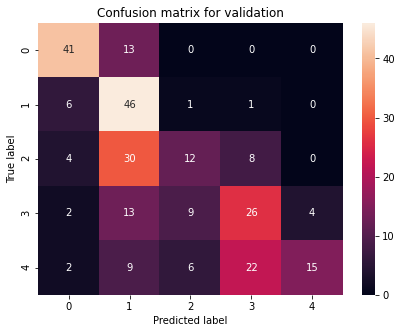

In [109]:
plotconf_cla(y_valid_k,y_predict_valid_regul_aug,'Confusion matrix for validation')

In [110]:
y_predict_prob_test_regul_aug = vgg_model_transfer_regul_aug.predict(X_test)

y_predict_test_regul_aug = y_predict_prob_test_regul_aug.argmax(axis=-1)


Classification Report  : 

              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.37      0.75      0.49        20
           2       0.50      0.35      0.41        20
           3       0.42      0.50      0.45        20
           4       0.50      0.05      0.09        20

    accuracy                           0.43       100
   macro avg       0.46      0.43      0.39       100
weighted avg       0.46      0.43      0.39       100



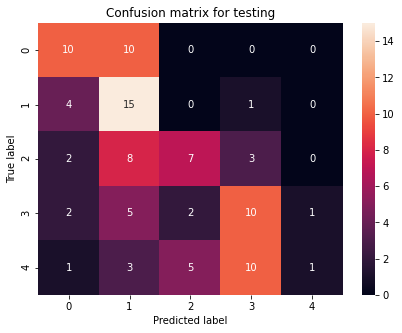

In [111]:
plotconf_cla(y_test_k,y_predict_test_regul_aug,'Confusion matrix for testing')

### Learning curve

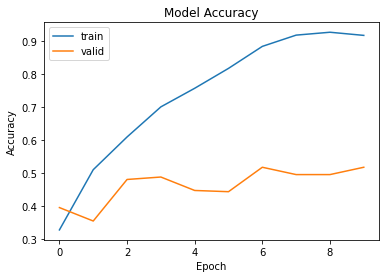

In [112]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_regul_aug.history :
    k = 'accuracy'    

if 'acc' in history_regul_aug.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_regul_aug.history[k])
    plt.plot(history_regul_aug.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()


## 5.1 Discussion

### according to the metrics of classification report and confusion matrix in Q4.1 and Q5 there is improvement but not that large , and according to the learning curves there is still over fitting occuring but we can feel the improvement in the metrics which means we can observe a a good improvement using the best regularization methods and data augmentation methods after a lot of tries when choosing the best suitable ones .